#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/ICPBL_data/MaskTheFace'

/content/drive/My Drive/ICPBL_data/MaskTheFace


In [3]:
import torch
from torch.utils.data import DataLoader
import os
from torchvision import transforms, datasets
from google.colab.patches import cv2_imshow
import cv2
import torchvision.models as models
from torchvision.transforms.functional import to_pil_image
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
test_transform =  transforms.Compose([transforms.Resize(size = [112, 112]),
                                  transforms.ToTensor()])

In [5]:
# 1. prepare data
image_path = data_dir = '/content/drive/MyDrive/ICPBL_data/test'

# ImageFolder and data_loader code below

test_dataset = datasets.ImageFolder(data_dir, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False)

In [9]:
# 2. load model
# model load below and assign device
model = torch.load('final_model.pth', map_location=torch.device('cpu'))

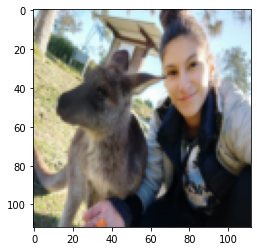

Label: 0
Predicted: 0 



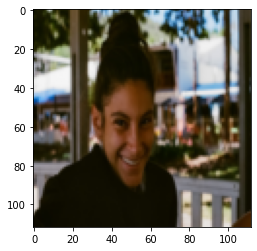

Label: 0
Predicted: 0 



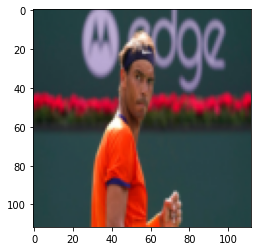

Label: 0
Predicted: 0 



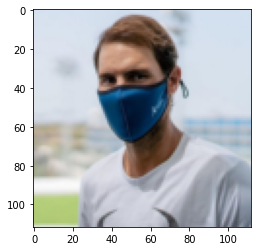

Label: 1
Predicted: 0 



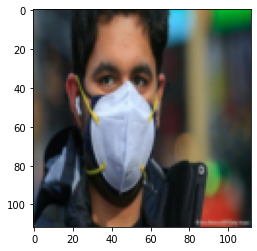

Label: 1
Predicted: 1 



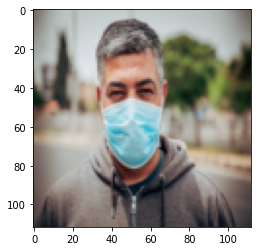

Label: 1
Predicted: 1 



In [10]:
# 3. perform evaluation
import helper 
for (image, label) in test_dataloader:
      # make the predictions and calculate the validation loss and accuracy
      pred = model(image)
      pred_test = torch.tensor([0 if i <= 0 else 1 for i in pred])

for i in range(len(pred_test)):
      img = image[i].squeeze()
      class_ = label[i]
      plt.imshow(img.permute((1, 2, 0)))
      plt.show()
      print(f"Label: {class_.item()}")
      print(f'Predicted: {pred_test[i].item()} \n')

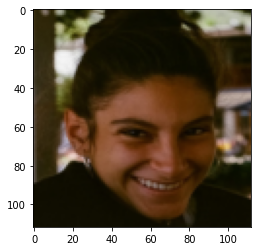

Label: 0
Predicted: 0 



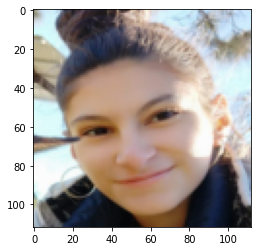

Label: 0
Predicted: 0 



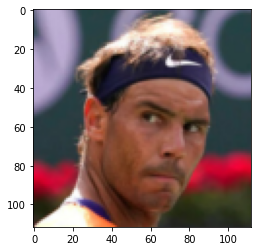

Label: 0
Predicted: 0 



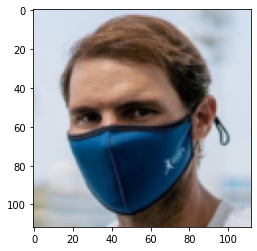

Label: 1
Predicted: 1 



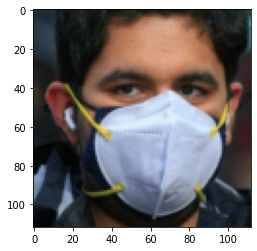

Label: 1
Predicted: 1 



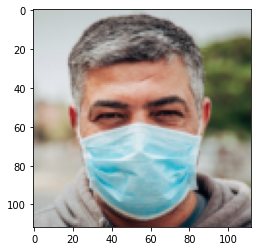

Label: 1
Predicted: 1 



In [11]:
#3.1 We now crop and center faces for simulating train data
data_dir = '/content/drive/MyDrive/ICPBL_data/test_cropped'


test_dataset = datasets.ImageFolder(data_dir, transform=test_transform)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False)

for (image, label) in test_dataloader:
      # make the predictions and calculate the validation loss and accuracy
      pred = model(image)
      pred_test = torch.tensor([0 if i <= 0 else 1 for i in pred])


for i in range(len(pred_test)):
      img = image[i].squeeze()
      class_ = label[i]
      plt.imshow(img.permute((1, 2, 0)))
      plt.show()
      print(f"Label: {class_.item()}")
      print(f'Predicted: {pred_test[i].item()} \n')